## Multiclass Classification with Rock/Paper/Scissors

I manually downloaded this and organized it so it's ready to be used by `ImageDataGenerator`.
The dataset is at `~/tensorflow_datasets/rps`

[Google Colab Notebook](https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/Course%202%20-%20Part%208%20-%20Lesson%202%20-%20Notebook%20(RockPaperScissors).ipynb#scrollTo=PnYP_HhYNVUK)


In [9]:
""" Change dataset_dir as needed to get: $HOME/tensorflow_datasets/rps """
dataset_dir = os.path.join('/Users/carlos/tensorflow_datasets/rps')
os.listdir(dataset_dir)

['.DS_Store', 'training', 'validation']

In [25]:
""" Explore the data """
train_dir = dataset_dir + '/training'
validation_dir = dataset_dir + '/validation'

rock_dir = train_dir + '/rock'
paper_dir = train_dir + '/paper'
scissors_dir = train_dir + '/scissors'

rock_files = os.listdir(rock_dir)
paper_files = os.listdir(paper_dir)
scissors_files = os.listdir(scissors_dir)

print('total training rock images     |', len(rock_files))
print(rock_files[:5])
print('total training paper images    |', len(paper_files))
print(paper_files[:5])
print('total training scissors images |', len(scissors_files))
print(scissors_files[:5])


total training rock images     | 840
['rock04-059.png', 'rock01-108.png', 'rock04-065.png', 'rock05ck01-067.png', 'rock05ck01-073.png']
total training paper images    | 840
['paper03-088.png', 'paper05-026.png', 'paper05-032.png', 'paper03-077.png', 'paper03-063.png']
total training scissors images | 840
['testscissors03-040.png', 'testscissors03-054.png', 'testscissors03-068.png', 'testscissors03-083.png', 'testscissors03-097.png']


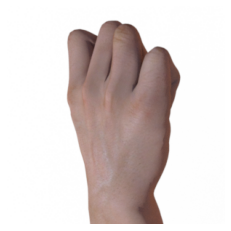

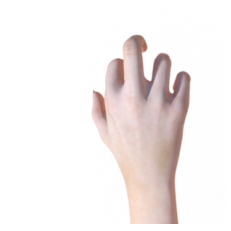

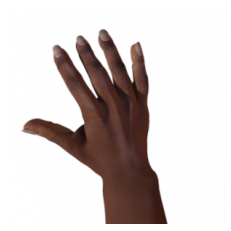

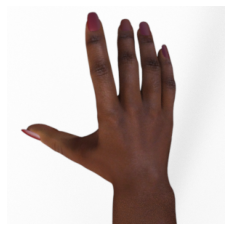

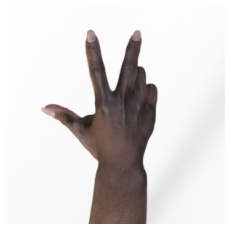

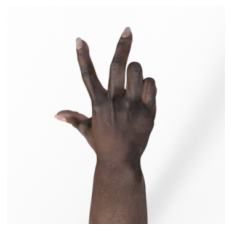

In [26]:
""" Peek at some training images """
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_rock = [os.path.join(rock_dir, fname) for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname) for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname) for fname in scissors_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock + next_paper + next_scissors):
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.axis('Off')
    plt.show()

In [27]:
from keras_preprocessing.image import ImageDataGenerator


training_datagen = ImageDataGenerator(
    rescale = 1./255,
	rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale = 1./255)


train_generator = training_datagen.flow_from_directory(
	train_dir,
	target_size=(150,150),
	class_mode='categorical',
    batch_size=126
)

validation_generator = validation_datagen.flow_from_directory(
	validation_dir,
	target_size=(150,150),
	class_mode='categorical',
    batch_size=126
)

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [28]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [30]:
""" Compile and Train

NOTE: This is a heavy training operation that maxed my Mac Mini. Might be a good idea to do this in the Google Colab referenced at the top ;)

Mac Mini (2018) Specs:
* Processor | 3.6 GHz Quad-Core Intel i3
* Memory    | 32 GB RAM 2667 MHz DDR4
* Graphics  | Intel UHD Graphics 630 1536 MB
"""
model.compile(
    loss='categorical_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)

history = model.fit(
    train_generator,
    epochs=25,
    steps_per_epoch=20,
    validation_data=validation_generator,
    validation_steps=3,
    verbose=1
)

model.save("rps.h5")

Epoch 1/25
20/20 [==============================] - 50s 2s/step - loss: 0.2282 - accuracy: 0.9310 - val_loss: 0.1793 - val_accuracy: 0.9355
Epoch 2/25
20/20 [==============================] - 46s 2s/step - loss: 0.0406 - accuracy: 0.9869 - val_loss: 0.3866 - val_accuracy: 0.8898
Epoch 3/25
20/20 [==============================] - 47s 2s/step - loss: 0.0692 - accuracy: 0.9762 - val_loss: 0.0259 - val_accuracy: 0.9866
Epoch 4/25
20/20 [==============================] - 50s 3s/step - loss: 0.1119 - accuracy: 0.9631 - val_loss: 0.0576 - val_accuracy: 0.9704
Epoch 5/25
20/20 [==============================] - 49s 2s/step - loss: 0.0625 - accuracy: 0.9813 - val_loss: 0.0663 - val_accuracy: 0.9704
Epoch 6/25
20/20 [==============================] - 47s 2s/step - loss: 0.0709 - accuracy: 0.9758 - val_loss: 0.0454 - val_accuracy: 0.9839
Epoch 7/25
20/20 [==============================] - 45s 2s/step - loss: 0.0783 - accuracy: 0.9746 - val_loss: 0.6784 - val_accuracy: 0.6882
Epoch 8/25
20/20 [==

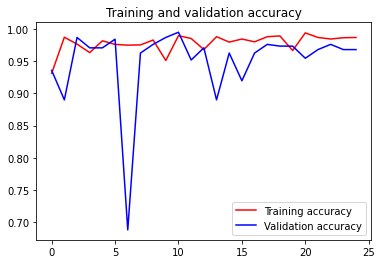

<Figure size 432x288 with 0 Axes>

In [31]:
""" Visualize the Training """
import matplotlib.pyplot as plt


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()